In [1]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image


# import keras.utils #Auxiliary library to load image

from keras.applications.vgg16 import preprocess_input, decode_predictions

import numpy as np
import pandas as pd

In [2]:
import os
os.path.expanduser('~/.keras/models/')

'C:\\Users\\Mehdi/.keras/models/'

In [3]:
model = VGG16(weights='imagenet')

In [4]:
# model.summary()

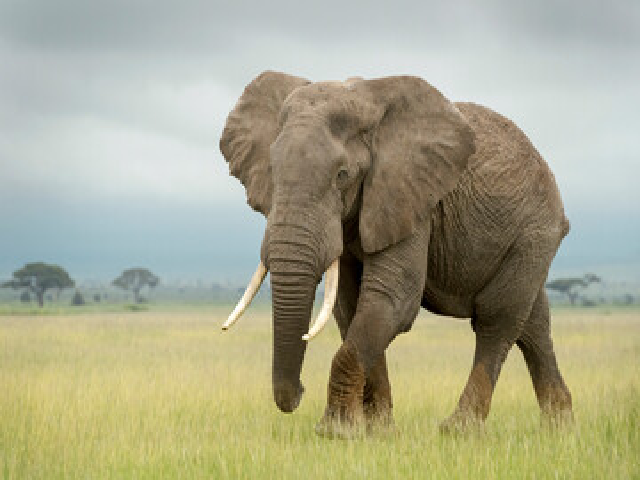

In [5]:
image_path = './images/elephant.jpg'
# image_path = './images/laptop.jpg'
# image_path = './images/stingray.jpg'

image.load_img(image_path, target_size=(480, 640))

In [93]:
img = image.load_img(image_path, target_size=(224, 224))
x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)
x = np.reshape(x, (1,) + x.shape)

x.min(), x.max()

(0.0, 255.0)

In [94]:
x = preprocess_input(x)
x.min(), x.max()

(-123.68, 151.061)

In [95]:
x.shape

(1, 224, 224, 3)

In [96]:
preds = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


In [97]:
np.sum(preds)

0.99999994

In [98]:
np.argmax(preds), np.max(preds)

(386, 0.54346365)

In [105]:
decode_predictions(preds, top=3) # [0][0][1]

[[('n02504458', 'African_elephant', 0.54346365),
  ('n01871265', 'tusker', 0.38450336),
  ('n02504013', 'Indian_elephant', 0.07199747)]]

## Confirm Predicted code

In [100]:
df = pd.read_json(os.path.expanduser('~/.keras/models/imagenet_class_index.json'), )
df.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,n01440764,n01443537,n01484850,n01491361,n01494475,n01496331,n01498041,n01514668,n01514859,n01518878,...,n12768682,n12985857,n12998815,n13037406,n13040303,n13044778,n13052670,n13054560,n13133613,n15075141
1,tench,goldfish,great_white_shark,tiger_shark,hammerhead,electric_ray,stingray,cock,hen,ostrich,...,buckeye,coral_fungus,agaric,gyromitra,stinkhorn,earthstar,hen-of-the-woods,bolete,ear,toilet_tissue


In [101]:
df[np.argmax(preds)]

0           n02504458
1    African_elephant
Name: 386, dtype: object

## Now lets create a function to predict an image

In [13]:
def predict_image(img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x);
    result = decode_predictions(preds, top=3)#[0][0][1]
    return result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


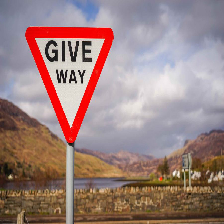

In [14]:
image_path = './images/give-way-sign-rural-900x600.jpg'
img = image.load_img(image_path, target_size=(224, 224))
predict_image(img)
img